In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from metaflow import Flow, get_metadata
from matplotlib import pyplot as plt

import plotly
from math import floor
import pickle
import plotly.graph_objects as go
from scipy.signal import savgol_filter
import yfinance as yf
from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)

In [2]:
def plot_spread(array, title, xlabel, ylabel):
    mean = smooth(np.mean(array, 0), 20)
    std = smooth(np.std(array, 0), 20)

    fig = go.Figure()

    colors = plotly.colors.sequential.Magenta

    upper_bound = go.Scatter(x=list(range(len(mean))), 
                             y=mean+std,
                             mode='lines',
                             fillcolor='rgba(0, 138, 196, 0.1)',
                             fill='tonexty',
                             line=dict(width=0),
                             hoverinfo='skip')

    trace = go.Scatter(x=list(range(len(mean))), 
                             y=mean,
                             mode='lines',
                             fillcolor='rgba(0, 138, 196, 0.1)',
                             fill='tonexty',
                             line=dict(color='#008ac4', width=2))

    lower_bound = go.Scatter(x=list(range(len(mean))), 
                             y=mean-std,
                             mode='lines',
                             line=dict(width=0),
                             hoverinfo='skip')

    data = [lower_bound, trace, upper_bound]

    layout = go.Layout(
        title_x=0.5,
        xaxis=dict(title=xlabel),
        yaxis=dict(title=ylabel),
        title=title,
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)

    return fig

In [211]:
def smooth(y, factor):
    box = np.ones(factor)/factor
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth[(factor//2):-(factor//2)]

def plot_runs(log_file='logs', train_test='train'):
    with open(f'data/{log_file}.pkl', 'rb') as handle:
        logs = pickle.load(handle)
        
    fig = go.Figure()
    
    baseline   = smooth(logs[f'{train_test}_baseline'], 4)
    portfolios = logs[train_test]

    for run, portfolio in enumerate(portfolios):
        scale = run / len(portfolios)
        
        if len(portfolios) == 1:
            scale = 1
        
        portfolio = smooth(portfolio, 4)
        
        fig.add_trace(go.Scatter(x=list(range(len(portfolio))), 
                                 y=portfolio,
                                 mode='lines',
                                 line=dict(color=f'rgba(0, 138, 196, {scale + .2})'),
                                 name=f'Run {run+1}'))
        
    fig.add_trace(go.Scatter(x=list(range(len(baseline))), 
                             y=baseline,
                             mode='lines',
                             line=dict(color='#ff8a00', width=3),
                             name=f'Original'))
    
    fig.update_layout(
        xaxis=dict(title='Step'),
        yaxis=dict(title='Portfolio ratio'),
        title='Portfolio ratio of different runs',
        title_x=0.5,
        showlegend = False)
    
    fig.show()
    
    portfolio = [log[:len(baseline)] for log in portfolios if len(log[:len(baseline)]) == len(baseline)]
    
    if len(portfolio) > 1:
        fig = plot_spread(np.array(portfolio), 
                title='Spread of different runs', 
                xlabel='Step', 
                ylabel='Portfolio ratio')

        fig.add_trace(go.Scatter(x=list(range(len(baseline))), 
                                 y=smooth(baseline, 20),
                                 mode='lines',
                                 line=dict(color='#ff8a00', width=3),
                                 name=f'Original'))

        fig.show()
    
    fig = plot_spread(np.array(np.array(portfolio) / np.array(baseline)), 
            title='Growth difference versus baseline', 
            xlabel='Step', 
            ylabel='Portfolio ratio')
    
    fig.add_trace(go.Scatter(x=list(range(len(baseline))), 
                             y=[1 for _ in baseline][16:],
                             mode='lines',
                             line=dict(color='#ff8a00', width=3),
                             name=f'Original'))
    
    fig.show()
    
plot_runs('logs', 'train')

In [212]:
plot_runs('logs', 'test')

In [167]:
a = np.zeros(10)
np.put(a,5,1)
a

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [6]:
in_array = [1, 2, 3, 4, 5, 6, 7, 8 ] 
print ("Input array : ", in_array) 
  
out_array = np.clip(in_array, a_min = 2, a_max = 6) 
print ("Output array : ", out_array) 

Input array :  [1, 2, 3, 4, 5, 6, 7, 8]
Output array :  [2 2 3 4 5 6 6 6]


In [39]:
action = 1

current_stock_price = 100
prev_stock_price    = 90
prev_n_stock_price  = 80

(1 + ((np.sign(action)) * ((current_stock_price - prev_stock_price) / prev_stock_price))) * (prev_stock_price / prev_n_stock_price)

1.25

In [8]:
a = np.array([1,2,3])
np.random.shuffle(a)
a

array([3, 1, 2])

In [13]:
a = np.zeros([2, 3])
print(a.shape)
# outputs: (2, 3)
b = np.random.randn(*a.shape)
print(b.shape)

(2, 3)
(2, 3)


In [140]:
import importlib
import stock
importlib.reload(stock)
from stock import Stock

stock = Stock(ticker='^GSPC', 
              window_size=200, 
              train_size=1,
              normalize=True,
              diff=True,
              clip=True,
              start_date='2000-1-1', 
              end_date='2010-12-31')

stock.stock_seq[:,:5]

array([[ 0.00508185, -0.72979002, -0.99879538,  0.18198687,  0.09394886],
       [-0.72979002, -0.99879538,  0.18198687,  0.09394886,  0.98749872],
       [-0.99879538,  0.18198687,  0.09394886,  0.98749872,  0.79251069],
       ...,
       [ 0.5373979 ,  0.42528994, -0.02019524, -0.3708578 ,  0.3784511 ],
       [ 0.42528994, -0.02019524, -0.3708578 ,  0.3784511 ,  0.50889637],
       [-0.02019524, -0.3708578 ,  0.3784511 ,  0.50889637, -0.40030396]])

In [49]:
stock = Stock(ticker='AMD', 
              window_size=200, 
              train_size=.01,
              price_look_back=100,
              normalize=True,
              diff=True,
              clip=False,
              start_date='2000-1-1', 
              end_date='2010-12-31')

stock.stock_seq[:,:5]

array([[-0.23997156,  0.83295596, -1.15664751,  0.15586578,  0.80170565],
       [ 0.83295596, -1.15664751,  0.15586578,  0.80170565,  0.02044774],
       [-1.15664751,  0.15586578,  0.80170565,  0.02044774,  1.06212495],
       ...,
       [ 0.2600335 ,  0.04128128, -0.53164118, -0.53164118, -0.03163612],
       [ 0.04128128, -0.53164118, -0.53164118, -0.03163612, -0.09413676],
       [-0.53164118, -0.53164118, -0.03163612, -0.09413676, -0.46914055]])

In [81]:
a = [1,2,3,4,-5]
np.sum(a)

5

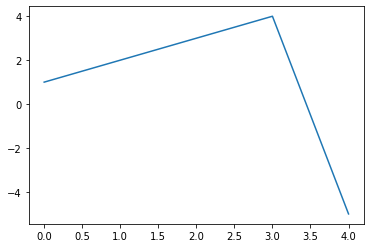

In [78]:
plt.plot(a)